In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import pandas_profiling as pp
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from xgboost import plot_importance

In [2]:
train_data = pd.read_csv('train_data/train.csv')
test_data = pd.read_csv('test_data/test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  33666

In [4]:
pp.ProfileReport(train_data)

Number of variables,24
Number of observations,341424
Total Missing (%),0.1%
Total size in memory,62.5 MiB
Average record size in memory,192.0 B
Numeric,14
Categorical,8
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 23 columns):
reservation_id              146765 non-null object
booking_date                146765 non-null object
checkin_date                146765 non-null object
checkout_date               146765 non-null object
channel_code                146765 non-null int64
main_product_code           146765 non-null int64
numberofadults              146765 non-null int64
numberofchildren            146765 non-null int64
persontravellingid          146765 non-null int64
resort_region_code          146765 non-null int64
resort_type_code            146765 non-null int64
room_type_booked_code       146765 non-null int64
roomnights                  146765 non-null int64
season_holidayed_code       146730 non-null float64
state_code_residence        144505 non-null float64
state_code_resort           146765 non-null int64
total_pax                   146765 non-null int64
member_age_buckets          146

In [6]:
pp.ProfileReport(test_data)

Number of variables,23
Number of observations,146765
Total Missing (%),0.1%
Total size in memory,25.8 MiB
Average record size in memory,184.0 B
Numeric,13
Categorical,8
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  33666

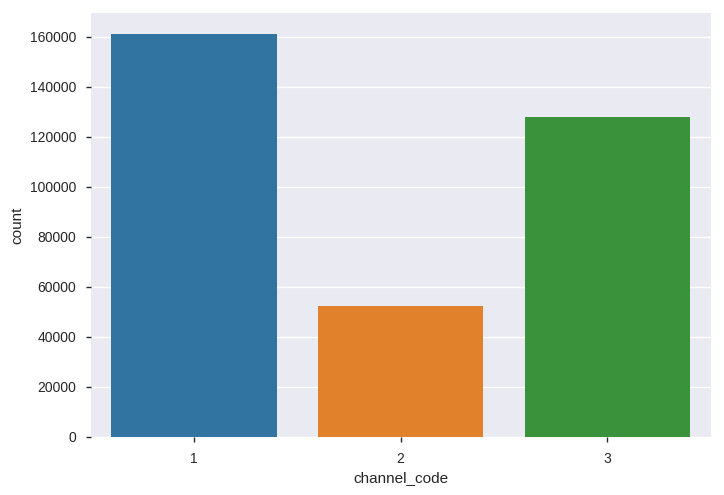

In [8]:
sns.countplot(train_data['channel_code'])

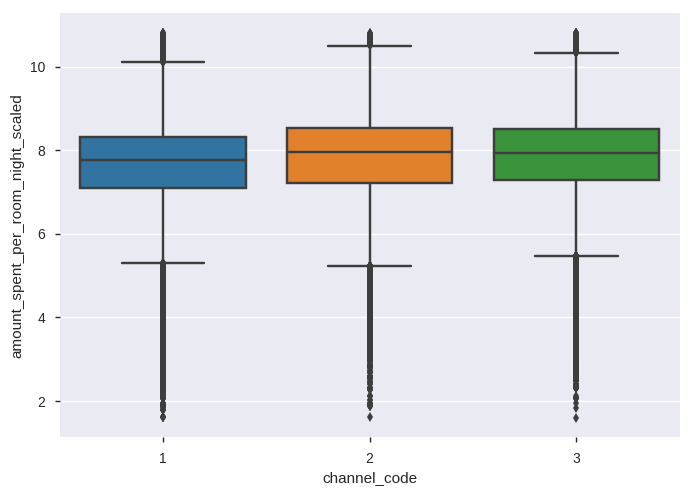

In [9]:
sns.boxplot(x="channel_code", y="amount_spent_per_room_night_scaled", data=train_data)

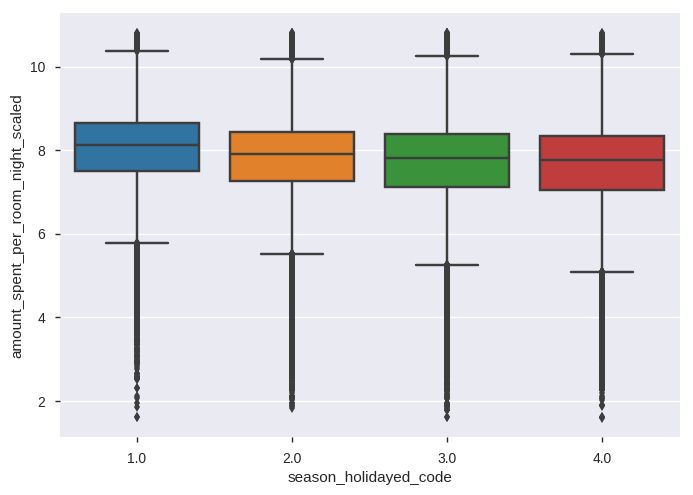

In [10]:
sns.boxplot(x="season_holidayed_code", y="amount_spent_per_room_night_scaled", data=train_data)

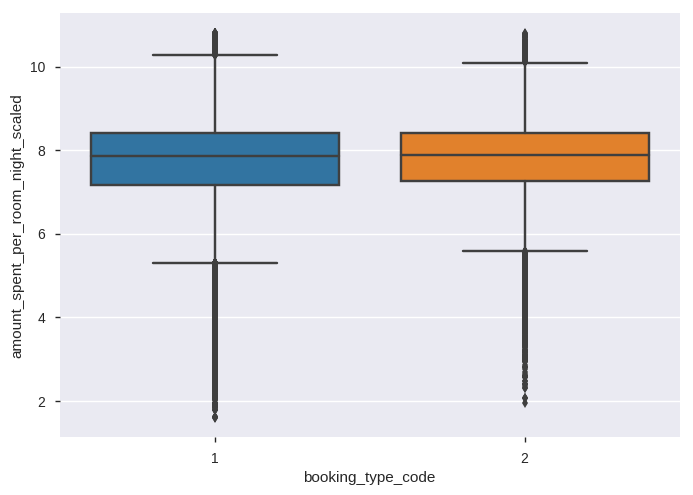

In [11]:
sns.boxplot(x="booking_type_code", y="amount_spent_per_room_night_scaled", data=train_data)

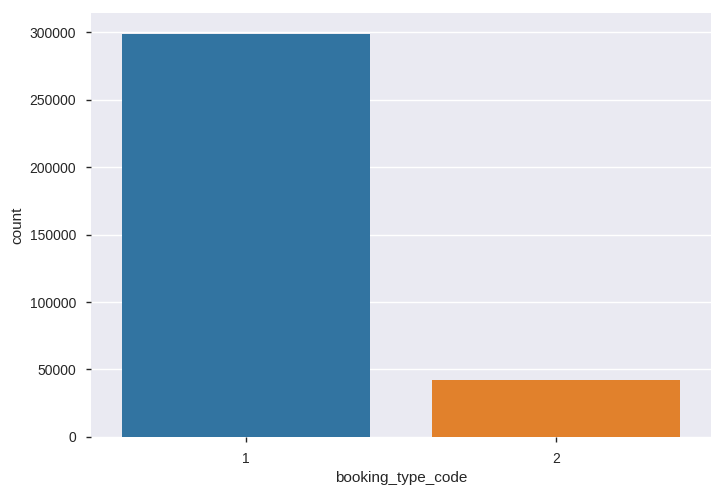

In [12]:
sns.countplot(train_data['booking_type_code'])

In [13]:
gp_season = train_data.groupby(['state_code_residence'], as_index=False)['amount_spent_per_room_night_scaled'].mean()
gp_season_sum = train_data.groupby(['state_code_residence'], as_index=False)['amount_spent_per_room_night_scaled'].sum()
gp_state_code_resort_sum =train_data.groupby(['state_code_resort'], as_index=False)['amount_spent_per_room_night_scaled'].sum()
#gp_category_sum = train_monthly.groupby(['item_category_id'], as_index=False)['item_cnt'].sum()
#gp_shop_mean = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].mean()
#gp_shop_sum = train_monthly.groupby(['shop_id'], as_index=False)['item_cnt'].sum()

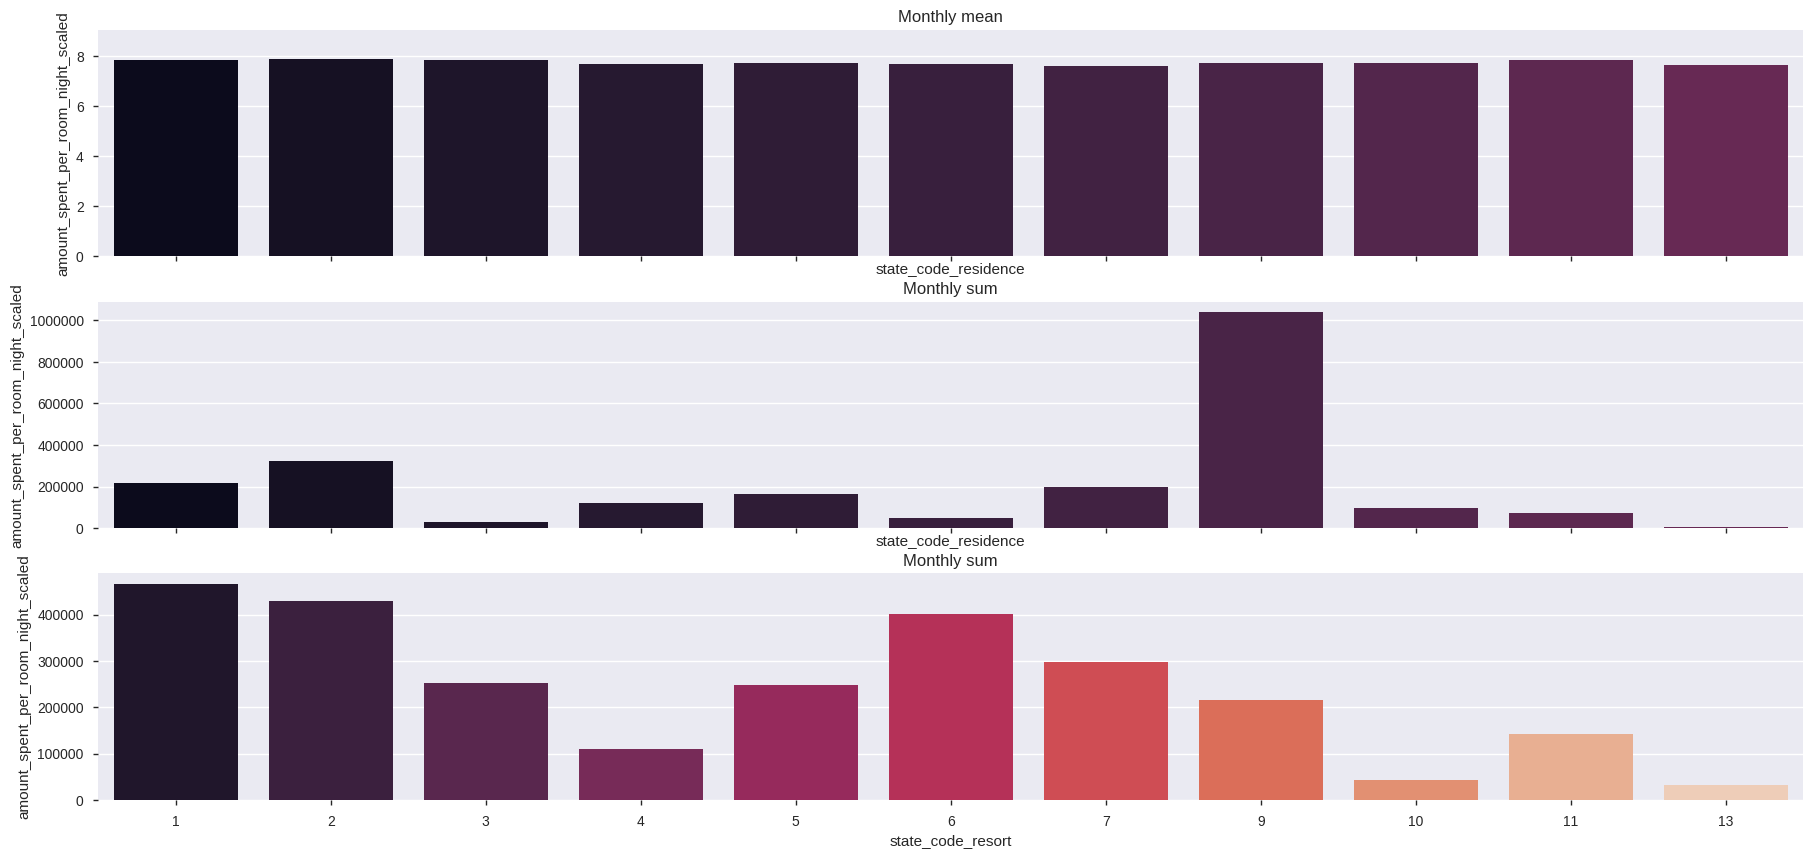

In [14]:
f, axes = plt.subplots(3, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="state_code_residence", y="amount_spent_per_room_night_scaled", data=gp_season, ax=axes[0], palette="rocket").set_title("Monthly mean")
sns.barplot(x="state_code_residence", y="amount_spent_per_room_night_scaled", data=gp_season_sum, ax=axes[1], palette="rocket").set_title("Monthly sum")
sns.barplot(x="state_code_resort", y="amount_spent_per_room_night_scaled", data=gp_state_code_resort_sum, ax=axes[2], palette="rocket").set_title("Monthly sum")
plt.show()

In [15]:
gp_main_product_code_sum =train_data.groupby(['main_product_code'], as_index=False)['amount_spent_per_room_night_scaled'].sum()

Text(0.5,1,'main_product_code')

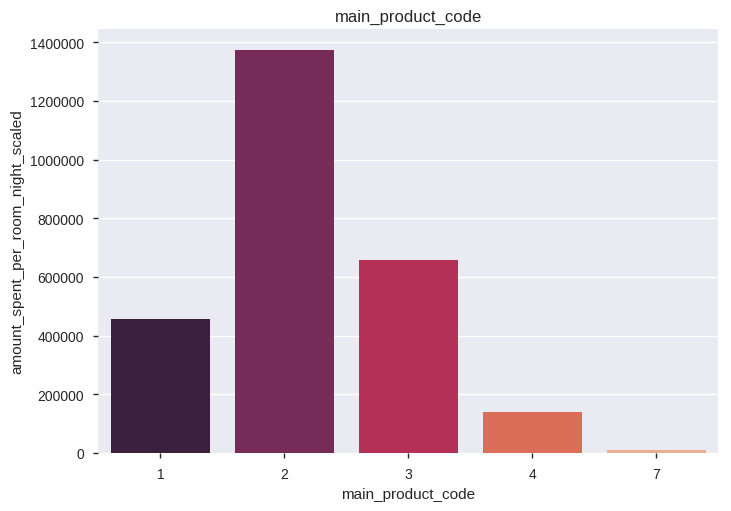

In [16]:
sns.barplot(x="main_product_code", y="amount_spent_per_room_night_scaled", data=gp_main_product_code_sum, palette="rocket").set_title("main_product_code")

Text(0.5,1,'member_age_buckets')

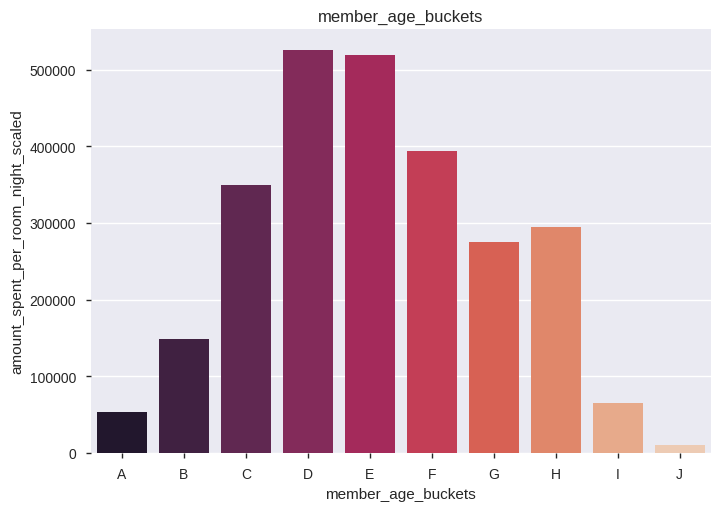

In [17]:
gp_member_age_buckets_sum = train_data.groupby(['member_age_buckets'], as_index=False)['amount_spent_per_room_night_scaled'].sum()
sns.barplot(x="member_age_buckets", y="amount_spent_per_room_night_scaled", data=gp_member_age_buckets_sum, palette="rocket").set_title("member_age_buckets")

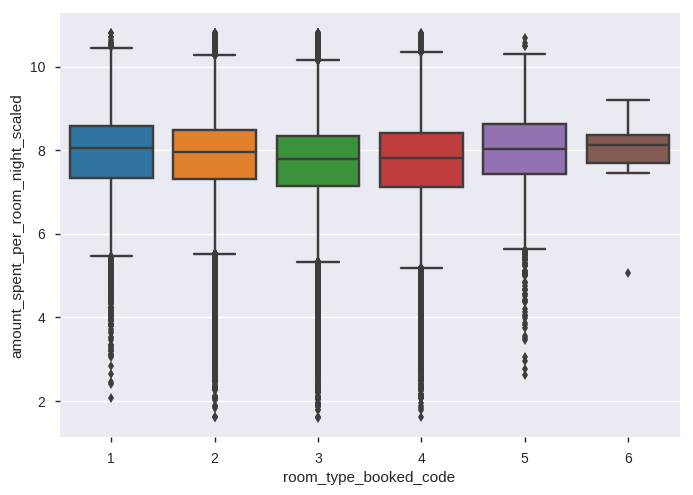

In [18]:
gp_room_type_booked_code_sum = train_data.groupby(['room_type_booked_code'], as_index=False)['amount_spent_per_room_night_scaled'].sum()
sns.boxplot(x="room_type_booked_code", y="amount_spent_per_room_night_scaled", data=train_data)

In [19]:
train_data.corr()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled
channel_code,1.000000,0.078592,0.054878,-0.174732,0.010688,0.040008,-0.058452,-0.003312,-0.075487,-0.129925,0.046851,0.035029,0.045837,0.199256,0.088124
main_product_code,0.078592,1.000000,-0.051106,-0.035599,-0.025569,-0.037862,-0.003098,0.004644,-0.124750,0.328671,0.021962,-0.029586,0.002428,0.186687,-0.081229
numberofadults,0.054878,-0.051106,1.000000,-0.046198,0.013902,-0.018484,-0.042959,-0.099708,0.570278,0.079502,-0.012523,0.017578,0.100545,-0.032301,0.150047
numberofchildren,-0.174732,-0.035599,-0.046198,1.000000,-0.059373,-0.032180,-0.031781,-0.109323,0.092463,-0.016638,-0.033052,-0.013662,0.197066,-0.034023,0.047827
persontravellingid,0.010688,-0.025569,0.013902,-0.059373,1.000000,-0.009558,0.002129,0.019123,-0.001703,0.009281,-0.007746,0.001255,-0.030348,-0.030379,-0.040716
resort_region_code,0.040008,-0.037862,-0.018484,-0.032180,-0.009558,1.000000,0.253969,0.077991,0.014965,-0.045848,0.151213,0.010455,-0.007599,-0.028229,-0.074258
resort_type_code,-0.058452,-0.003098,-0.042959,-0.031781,0.002129,0.253969,1.000000,0.227159,0.037114,0.040751,0.050255,-0.052935,-0.088913,-0.014178,-0.024186
room_type_booked_code,-0.003312,0.004644,-0.099708,-0.109323,0.019123,0.077991,0.227159,1.000000,0.172927,-0.012606,0.015425,0.121544,-0.432680,-0.130045,-0.050563
roomnights,-0.075487,-0.124750,0.570278,0.092463,-0.001703,0.014965,0.037114,0.172927,1.000000,0.025776,-0.007972,0.006193,-0.116305,-0.141809,0.050379
season_holidayed_code,-0.129925,0.328671,0.079502,-0.016638,0.009281,-0.045848,0.040751,-0.012606,0.025776,1.000000,-0.005810,-0.050900,-0.112333,0.004642,-0.082124


Handling outlier

In [20]:
outlier_index = train_data[(train_data['reservationstatusid_code'] == 'D') | (train_data['roomnights'] < 0)].index
train_data.drop(outlier_index,inplace = True)

In [21]:
reservation_id_test = test_data['reservation_id']

Combining Train and Test

In [22]:
total_data=train_data.append(test_data,ignore_index=True)
total_data.head()

/home/yash/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,amount_spent_per_room_night_scaled,booking_date,booking_type_code,channel_code,checkin_date,checkout_date,cluster_code,main_product_code,member_age_buckets,memberid,...,reservationstatusid_code,resort_id,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax
0,7.706428,05/04/18,1,3,05/04/18,06/04/18,F,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,3,3,3,1,2.0,7.0,3,3
1,6.662563,23/01/15,1,1,11/04/15,16/04/15,F,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,3,3,4,5,2.0,7.0,5,2
2,7.871602,28/01/15,1,1,01/02/15,05/02/15,E,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1,5,4,4,2.0,7.0,1,2
3,5.344943,02/05/15,1,1,11/06/15,16/06/15,D,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2,2,3,5,2.0,7.0,2,2
4,7.059346,02/09/15,1,1,14/12/15,19/12/15,D,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2,2,4,5,2.0,7.0,2,2


### Feature Engineering

Dealing with date feature 

In [23]:
total_data['total_pax'] = total_data['numberofadults']+total_data['numberofchildren']

def d(v):
    return "/".join(v.split("/")[:-1])+'/20'+"".join(v.split("/")[-1])

total_data['booking_date'] = pd.to_datetime(total_data['booking_date'].apply(d),format='%d/%m/%Y',errors='coerce')
total_data['checkin_date'] = pd.to_datetime(total_data['checkin_date'].apply(d),format='%d/%m/%Y',errors='coerce')
total_data['checkout_date'] = pd.to_datetime(total_data['checkout_date'].apply(d),format='%d/%m/%Y',errors='coerce')

total_data['day_name_of_booking'] = total_data['booking_date'].dt.week
total_data['booking_diffeerence'] = (total_data['checkin_date'] - total_data['booking_date']).dt.days
total_data['booking_day'] = total_data['booking_date'].dt.day
total_data['booking_month'] = total_data['booking_date'].dt.month
total_data['booking_year'] =total_data['booking_date'].dt.year

total_data['day_name_of_checkin'] = total_data['checkin_date'].dt.week
total_data['checkin_day'] = total_data['checkin_date'].dt.day
total_data['checkin_month'] = total_data['checkin_date'].dt.month
total_data['checkin_year'] =total_data['checkin_date'].dt.year

total_data['day_name_of_checkout'] = total_data['checkout_date'].dt.week
total_data['checkout_day'] = total_data['checkout_date'].dt.day
total_data['checkout_month'] = total_data['checkout_date'].dt.month
total_data['checkout_year'] =total_data['checkout_date'].dt.year

Filling missing values 

In [24]:
total_data['season_holidayed_code'].fillna(0,inplace=True)
total_data['state_code_residence'].fillna(0,inplace=True)

Group based feature

In [25]:
gp_channel_spent = total_data.groupby(['channel_code'], as_index=False).agg({'amount_spent_per_room_night_scaled':[np.min, np.max]})
gp_channel_spent.columns = ['channel_code', 'channel_code_min_spent', 'channel_code_max_spent']

total_data = pd.merge(total_data, gp_channel_spent, on="channel_code",how='left')

In [26]:
gp_main_product_spent = total_data.groupby(['main_product_code'], as_index=False).agg({'amount_spent_per_room_night_scaled':[np.min, np.max ,np.mean]})
gp_main_product_spent.columns = ['main_product_code', 'main_product_code_min_spent', 'main_product_max_spent' ,'main_product_mean_spent']

total_data = pd.merge(total_data, gp_main_product_spent, on="main_product_code",how='left')

In [27]:
gp_persontravellingid_spent = total_data.groupby(['persontravellingid'], as_index=False).agg({'amount_spent_per_room_night_scaled':[np.min, np.max ,np.mean]})
gp_persontravellingid_spent.columns = ['persontravellingid', 'persontravellingid_min_spent', 'persontravellingid_max_spent' ,'persontravellingid_mean_spent']

total_data = pd.merge(total_data,gp_persontravellingid_spent, on="persontravellingid",how='left')

In [28]:
gp_resort_type_code_spent = total_data.groupby(['resort_type_code'], as_index=False).agg({'amount_spent_per_room_night_scaled':[np.min, np.max ,np.mean]})
gp_resort_type_code_spent.columns = ['resort_type_code', 'resort_type_code_min_spent', 'resort_type_code_max_spent' ,'resort_type_code_mean_spent']

total_data = pd.merge(total_data, gp_resort_type_code_spent, on="resort_type_code",how='left')

In [29]:
gp_room_type_booked_code_spent = total_data.groupby(['room_type_booked_code'], as_index=False).agg({'amount_spent_per_room_night_scaled':[np.min, np.max ,np.mean]})
gp_room_type_booked_code_spent.columns = ['room_type_booked_code', 'room_type_booked_code_min_spent', 'room_type_booked_code_max_spent' ,'room_type_booked_code_mean_spent']

total_data = pd.merge(total_data,gp_room_type_booked_code_spent, on="room_type_booked_code",how='left')

In [30]:
gp_season_holidayed_code_spent = total_data.groupby(['season_holidayed_code'], as_index=False).agg({'amount_spent_per_room_night_scaled':[np.min, np.max ,np.mean]})
gp_season_holidayed_code_spent.columns = ['season_holidayed_code', 'season_holidayed_code_min_spent', 'season_holidayed_code_max_spent' ,'season_holidayed_code_mean_spent']

total_data = pd.merge(total_data,gp_season_holidayed_code_spent, on="season_holidayed_code",how='left')

In [31]:
gp_total_pax_spent = total_data.groupby(['total_pax'], as_index=False).agg({'amount_spent_per_room_night_scaled':[np.min, np.max ,np.mean]})
gp_total_pax_spent.columns = ['total_pax', 'total_pax_min_spent', 'total_pax_max_spent' ,'total_pax_mean_spent']

total_data = pd.merge(total_data,gp_total_pax_spent, on="total_pax",how='left')

In [32]:
gp_member_age_buckets_spent = total_data.groupby(['member_age_buckets'], as_index=False).agg({'amount_spent_per_room_night_scaled':[np.min, np.max ,np.mean]})
gp_member_age_buckets_spent.columns = ['member_age_buckets', 'member_age_buckets_min_spent', 'member_age_buckets_max_spent' ,'member_age_buckets_mean_spent']

total_data = pd.merge(total_data,gp_member_age_buckets_spent, on="member_age_buckets",how='left')

Label Encoding and Mean Encoding

In [33]:
lb_make = LabelEncoder()
total_data["memberid"] = lb_make.fit_transform(total_data["memberid"])
total_data['resort_id'] = lb_make.fit_transform(total_data['resort_id'])
total_data["member_age_buckets"] = lb_make.fit_transform(total_data["member_age_buckets"])
total_data["reservationstatusid_code"] = lb_make.fit_transform(total_data["reservationstatusid_code"])

In [34]:
# resort_id mean encoding.
gp_resort_id_mean = total_data.groupby(['resort_id']).agg({'amount_spent_per_room_night_scaled': ['mean']})
gp_resort_id_mean.columns = ['resort_id_mean']
total_data = pd.merge(total_data,gp_resort_id_mean, on="resort_id",how='left')

In [35]:
total_data['booking_channel_type'] = total_data['booking_type_code'] + total_data['channel_code']
total_data['state_resort_residence'] = total_data['state_code_residence'] +total_data['state_code_resort']
total_data['resort_region_type'] = total_data['resort_region_code'] + total_data['resort_type_code']

In [36]:
total_data.drop(['reservation_id','booking_date','checkin_date','checkout_date','cluster_code'],axis=1,inplace=True)

In [37]:
train_data = total_data[total_data['amount_spent_per_room_night_scaled'].isnull()!=True]
test_data = total_data[total_data['amount_spent_per_room_night_scaled'].isnull()==True]
train_data.head()

,amount_spent_per_room_night_scaled,booking_type_code,channel_code,main_product_code,member_age_buckets,memberid,numberofadults,numberofchildren,persontravellingid,reservationstatusid_code,...,total_pax_min_spent,total_pax_max_spent,total_pax_mean_spent,member_age_buckets_min_spent,member_age_buckets_max_spent,member_age_buckets_mean_spent,resort_id_mean,booking_channel_type,state_resort_residence,resort_region_type
0,7.706428,1,3,1,5,34521,2,0,46,2,...,1.608938,10.81454,7.498247,1.609438,10.806107,7.717617,7.671135,4,10.0,6
1,6.662563,1,1,1,5,34521,2,0,46,0,...,1.608938,10.81454,7.498247,1.609438,10.806107,7.717617,7.598911,2,12.0,6
2,7.871602,1,1,1,5,34521,2,0,47,0,...,1.608938,10.81454,7.498247,1.609438,10.806107,7.717617,8.046202,2,8.0,6
3,5.344943,1,1,1,5,34521,2,2,46,0,...,1.609438,10.77046,7.806742,1.609438,10.806107,7.717617,7.704788,2,9.0,4
4,7.059346,1,1,1,5,34521,2,0,46,0,...,1.608938,10.81454,7.498247,1.609438,10.806107,7.717617,7.704788,2,9.0,4


In [38]:
X,Y = train_data.drop('amount_spent_per_room_night_scaled',axis=1),train_data['amount_spent_per_room_night_scaled']
test_data.drop('amount_spent_per_room_night_scaled',axis=1,inplace = True)

/home/yash/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146765 entries, 341422 to 488186
Data columns (total 58 columns):
booking_type_code                   146765 non-null int64
channel_code                        146765 non-null int64
main_product_code                   146765 non-null int64
member_age_buckets                  146765 non-null int64
memberid                            146765 non-null int64
numberofadults                      146765 non-null int64
numberofchildren                    146765 non-null int64
persontravellingid                  146765 non-null int64
reservationstatusid_code            146765 non-null int64
resort_id                           146765 non-null int64
resort_region_code                  146765 non-null int64
resort_type_code                    146765 non-null int64
room_type_booked_code               146765 non-null int64
roomnights                          146765 non-null int64
season_holidayed_code               146765 non-null float64
state_code_r

Model

In [44]:
xgb_model = XGBRegressor(nthread=6,
                         max_depth=8, 
                         n_estimators=2000, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.1, 
                         seed=0)

In [ ]:
errcb=[]
y_pred_test=[]

fold = KFold(n_splits=20,shuffle=True,random_state=1994)

for train_index, test_index in fold.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    xgb_model.fit(X_train, 
              y_train, 
              eval_metric="rmse", 
              eval_set=[(X_train, y_train), (X_test, y_test)], 
              verbose=20,
              early_stopping_rounds=300)
    preds = xgb_model.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_test,preds)))
    p = xgb_model.predict(test_data)
    y_pred_test.append(p)

[0]	validation_0-rmse:6.58827	validation_1-rmse:6.59077
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 300 rounds.
[20]	validation_0-rmse:1.2933	validation_1-rmse:1.30006
[40]	validation_0-rmse:1.01832	validation_1-rmse:1.02937
[60]	validation_0-rmse:1.00942	validation_1-rmse:1.02235
[80]	validation_0-rmse:1.00524	validation_1-rmse:1.01955
[100]	validation_0-rmse:1.00097	validation_1-rmse:1.01649
[120]	validation_0-rmse:0.997383	validation_1-rmse:1.01395
[140]	validation_0-rmse:0.992484	validation_1-rmse:1.01058
[160]	validation_0-rmse:0.989234	validation_1-rmse:1.00862
[180]	validation_0-rmse:0.985005	validation_1-rmse:1.00571
[200]	validation_0-rmse:0.981357	validation_1-rmse:1.00345
[220]	validation_0-rmse:0.978819	validation_1-rmse:1.00193
[240]	validation_0-rmse:0.976434	validation_1-rmse:1.0011
[260]	validation_0-rmse:0.974825	validation_1-rmse:1.00058
[280]	validation_0-rmse:0.97

In [43]:
np.mean(errcb)

0.9892224383489205

In [30]:
submission = pd.DataFrame({'reservation_id':reservation_id_test,'amount_spent_per_room_night_scaled':np.mean(y_pred_test,0)})
submission = submission[['reservation_id','amount_spent_per_room_night_scaled']]
submission.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7.932908
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.469593
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.593925
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.816692
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.823911


In [37]:
submission_1.to_csv('submission_2.csv',index=False)